In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [5]:
#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

# Exploratory Data Analysis for all Data Roles


### Roles to Explore

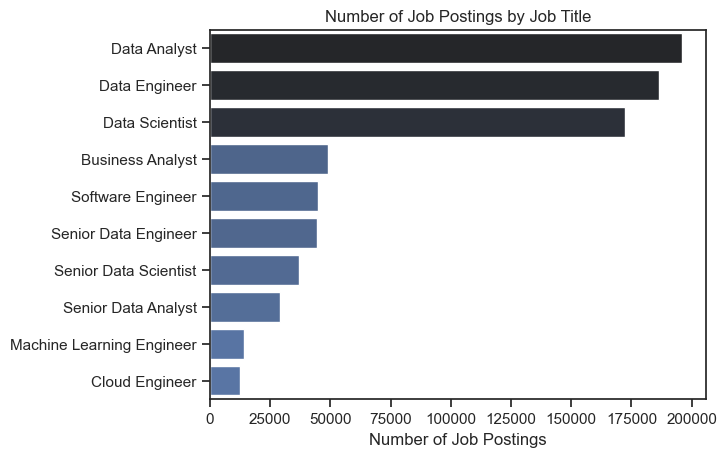

In [55]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style = 'ticks')              #defining the theme
sns.barplot(data = df_plot,                 #plotting the barplot
            x = 'count',                    #x-axis
            y = 'job_title_short',          #y-axis
            hue = 'count',                 
            palette = 'dark:b_r',           #color palette
            legend=False                    #removing the legend
            )

plt.title('Number of Job Postings by Job Title')
plt.xlabel('Number of Job Postings')
plt.ylabel('')

plt.show()

### Countries to Explore

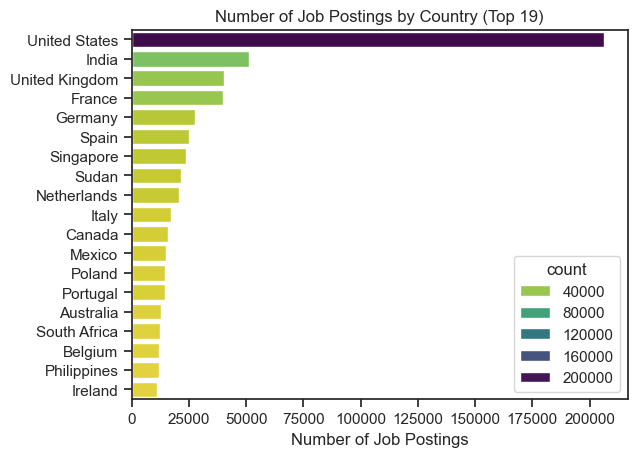

In [8]:
df_plot_countries = df['job_country'].value_counts().head(19).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data = df_plot_countries,
            x = 'count',
            y = 'job_country',
            hue = 'count',
            palette='viridis_r'
            
            )

plt.title('Number of Job Postings by Country (Top 19)')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.show()


### Companies to Explore

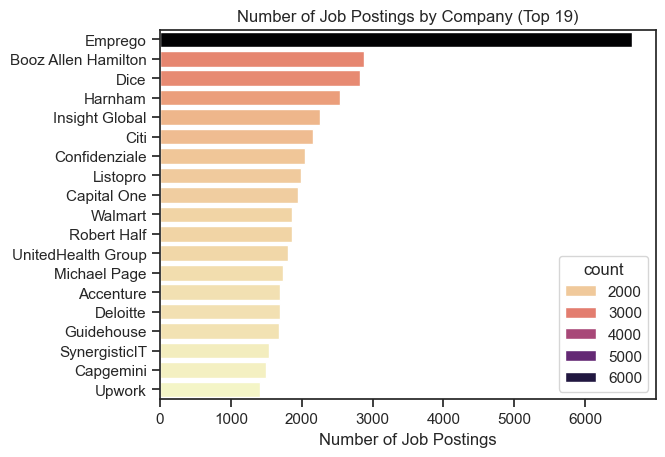

In [9]:
df_plot_com = df['company_name'].value_counts().head(19).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data = df_plot_com,
            x = 'count',
            y = 'company_name',
            hue = 'count',
            palette='magma_r'
            
            )
plt.title('Number of Job Postings by Company (Top 19)')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.show()


### Job Opportunities

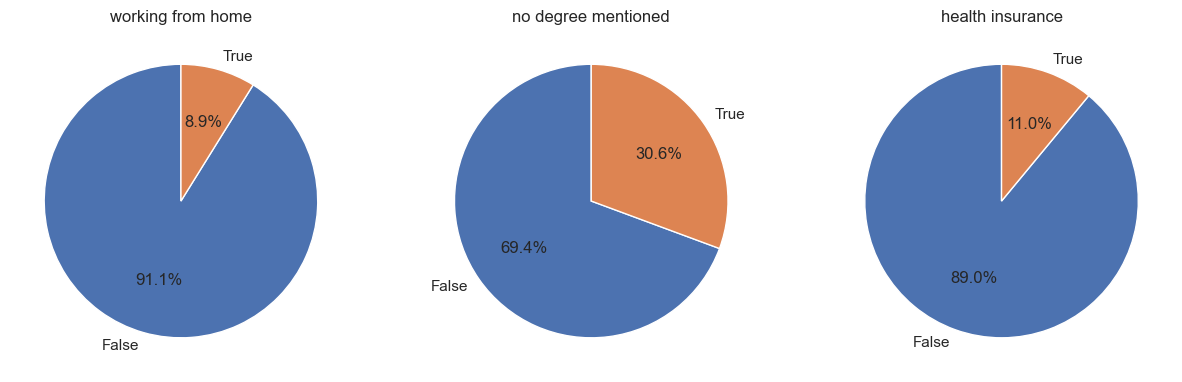

In [ ]:
job_opportunities = {
    'job_work_from_home': 'working from home',
    'job_no_degree_mention': 'no degree mentioned',
    'job_health_insurance': 'health insurance'
}

# Creating subplots
fig, ax = plt.subplots(1,3, figsize = (15,5))  

# Plotting pie charts
for i, (column, title) in enumerate(job_opportunities.items()):
    ax[i].pie(df[column].value_counts(), labels = [False, True], startangle = 90, autopct = '%1.1f%%')
    ax[i].set_title(title)

plt.show()

## Filter for US Data Analyst roles

In [11]:
df_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]


### Locations to Explore:

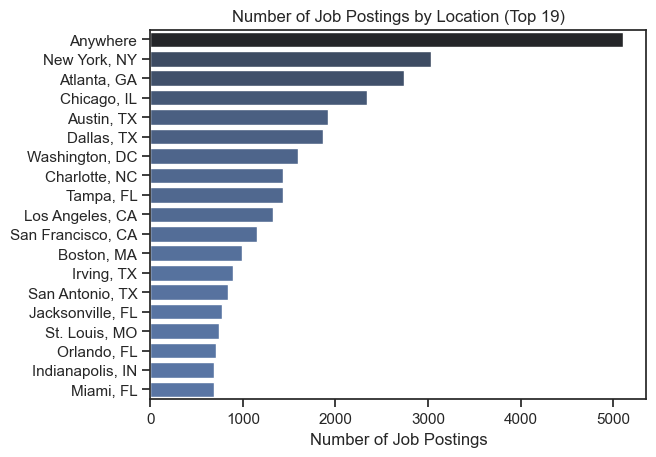

In [ ]:
df_loca = df_US['job_location'].value_counts().head(19).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data = df_loca,
            x = 'count',
            y = 'job_location',
            hue = 'count',
            palette = 'dark:b_r',
            legend=False
            )

plt.title('Number of Job Postings by Location (Top 19)')
plt.xlabel('Number of Job Postings')        
plt.ylabel('')
plt.show()


### Job Opportunities

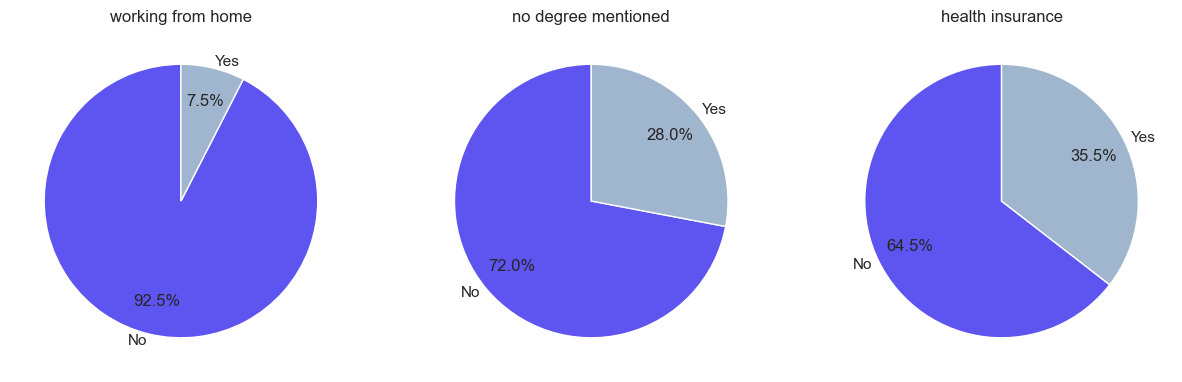

In [40]:
job_opportunities = {
    'job_work_from_home': 'working from home',
    'job_no_degree_mention': 'no degree mentioned',
    'job_health_insurance': 'health insurance'
}

fig, ax = plt.subplots(1,3, figsize = (15,5))
for i, (column, title) in enumerate(job_opportunities.items()):
    ax[i].pie(df_US[column].value_counts(),
                labels = ['No', 'Yes'],
                startangle = 90,
                autopct = '%1.1f%%',
                colors = ["#5E54EF", "#a0b6ce"],
                pctdistance=0.75,
                labeldistance=1.05,
                
                )
    ax[i].set_title(title)

plt.show()

### Companies to Explore:

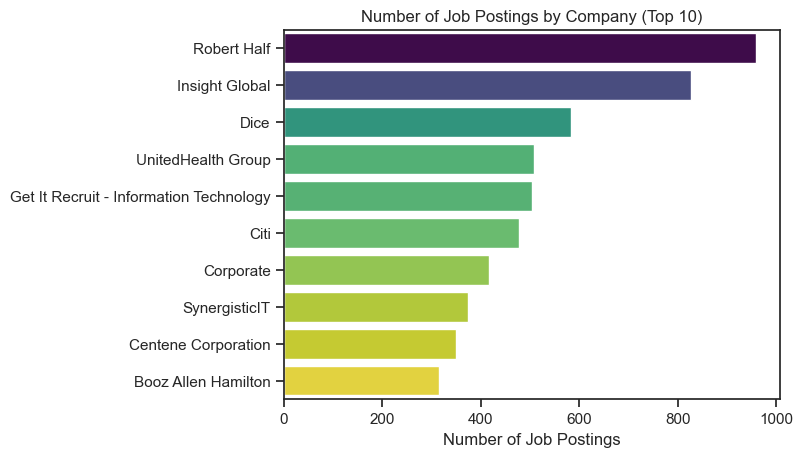

In [54]:
df_compa = df_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data = df_compa,
            x = 'count',
            y = 'company_name',
            hue = 'count',
            palette = 'viridis_r',
            legend=False
            )

plt.title('Number of Job Postings by Company (Top 10)') 
plt.xlabel('Number of Job Postings')
plt.ylabel('')

plt.show()



# What are the most demanded skills for the top 3 most popular data roles?

## Methodology

## Methodology

#### 1- Clean-up skill column.
#### 2- Calculate skill count based on job_title_short.
#### 3- Calculate skill percentage.
#### 4- Plot final findings.